In [1]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader 
import torch
import matplotlib.pyplot as plt

In [8]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [3]:
# Net
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1,16,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16,32,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.out = nn.Linear(32*7*7,10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)

        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output

In [4]:
model = Net().to("mps")
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

losses = []

In [5]:
for epoch in range(5):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to("mps"), target.to("mps")
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        losses.append(loss.item())


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.315755
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.849571
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.781055
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.520596
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.277345
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.187742
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.273052
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.382256
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.153987
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.193771
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.299562
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.129373
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.223988
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.136186
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.081298
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.097893
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.052082
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.061237
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.189183
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.137111
Train Epoch:

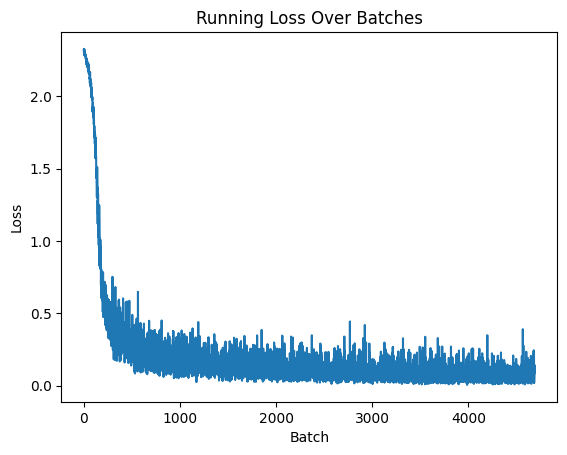

In [6]:
plt.plot(losses)
plt.title("Running Loss Over Batches")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.show()

In [7]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to("mps"), labels.to("mps")
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on the test set: {accuracy}%")

Accuracy on the test set: 97.99%
